# Corneal OCT quantification 
## For "Haze" detection

In [1]:
from image_OCT import *
from image_Quantification import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
# plt.figure
# plt.savefig(os.path.join(savefold, 'coucou'+extension))

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
def plot_treatment(im):
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

def plot_profile(im,im_Q):
	res=im_Q.res
	peak=res[0];xmin=res[1];xmax=res[2];xlow1=res[3];xlow2=res[4];extractedProf=res[5]	
	plt.subplot(211)
	plt.imshow(im.OCT_flat.transpose(),cmap="gray",aspect="auto")
	plt.axis("off")
	plt.subplot(212)
	plt.plot(im_Q.intentityProfile)
	plt.xlim([0,im_Q.intentityProfile.shape[0]])
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	# plt.show()

def plot_quantification(im_Q):
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")
	# plt.show()

def plot_extracted(im,im_Q):
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")


## Example of profile extraction and fitting

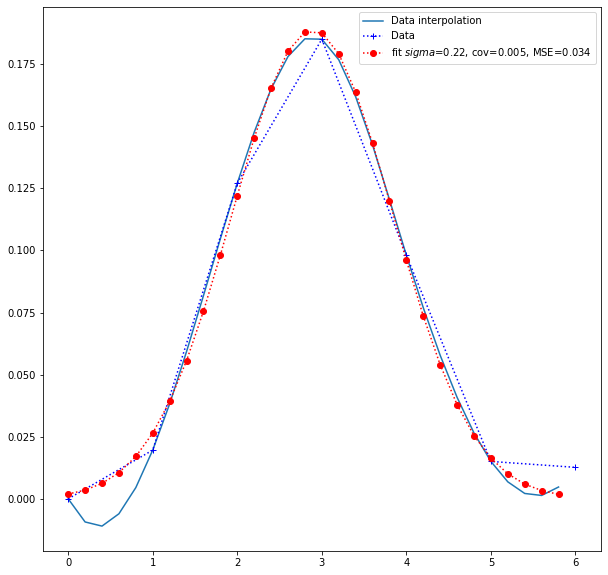

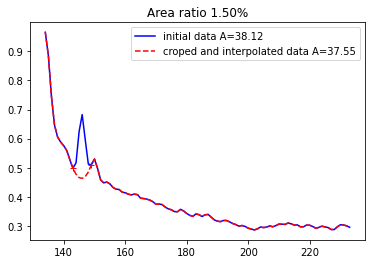

<Figure size 432x288 with 0 Axes>

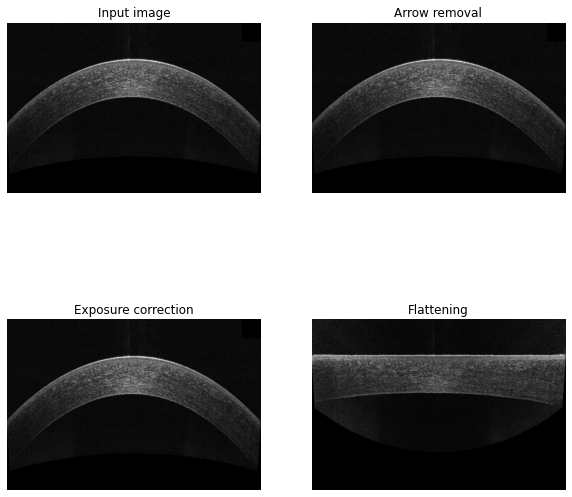

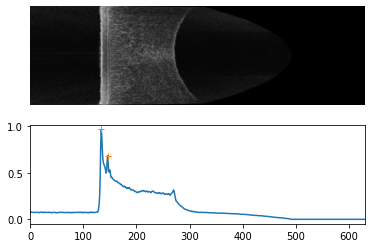

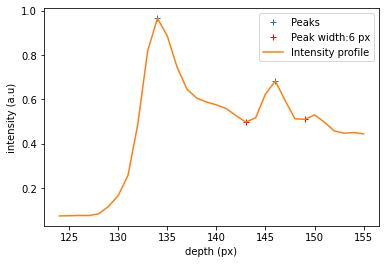

In [3]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')

im=image_OCT(filepathname)
im.AutoTreatment()

plt.figure(figsize=(10,10))
im_Q=image_Quantification(im,True)
plt.savefig(savefold+"profile"+extension)

plt.figure(figsize=(10,10))
plot_treatment(im)
plt.savefig(savefold+"profile1"+extension)

plt.figure()
plot_profile(im,im_Q)
plt.savefig(savefold+"profile2"+extension)

plt.figure()
plot_quantification(im_Q)
plt.savefig(savefold+"profile3"+extension)
# plt.imshow(im.OCT_flat)
# filepathname="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE/haze 1.jpg"
# im=image_OCT(filepathname)
# im.AutoTreatment()
# im_Q=image_Quantification(im,plot=True)
# plot_profile(im,im_Q.res)
# plt.imshow(im.OCT_flat)

## Multi-image treatment

Error with: haze 6.jpg image #6
Error with: 80608_REZAZK_OS.jpg image #8


<Figure size 432x288 with 0 Axes>

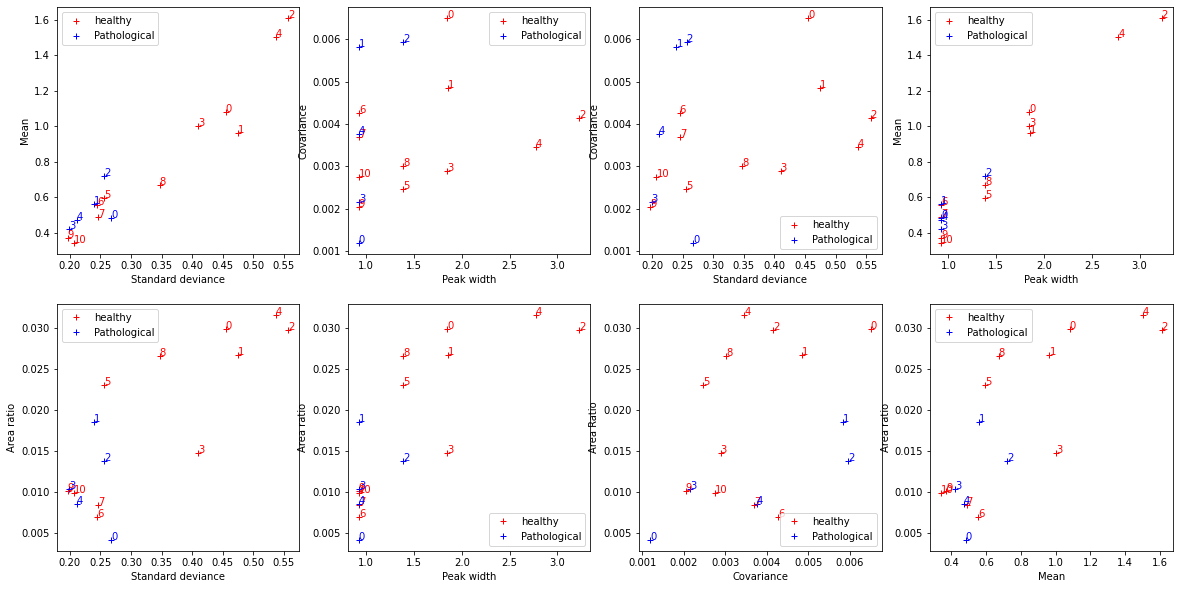

In [5]:
# repertory_haze="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE"
repertory_haze=os.path.join(dirname, 'Data','HAZE')
# repertory_healthy="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Healthy"
repertory_healthy=os.path.join(dirname, 'Data','Healthy')
files_haze = [f for f in listdir(repertory_haze) if isfile(join(repertory_haze, f))]
files_healthy = [f for f in listdir(repertory_healthy) if isfile(join(repertory_healthy, f))]

quantification_haze=[]
i=0
for haze in files_haze:
	i+=1
	# im=image_OCT(repertory_haze+"\\"+haze)
	im=image_OCT(os.path.join(repertory_haze, haze))
	try:
		im.AutoTreatment()
		# res=im.Profile_quantification()
		im_Q=image_Quantification(im,False)

		# quantification=quantify(im,res,False)
		quantification=im_Q.param

		quantification_haze.append(quantification)
	except:
		print("Error with: "+haze+" image #"+str(i))

quantification_healthy=[]
i=0
for healthy in files_healthy:
	i+=1
	# im=image_OCT(repertory_healthy+"\\"+healthy)
	im=image_OCT(os.path.join(repertory_healthy, healthy))
	try:
		im.AutoTreatment()
		# res=im.Profile_quantification()
		im_Q=image_Quantification(im,False)

		# quantification=quantify(im,res,False)
		quantification=im_Q.param
		
		quantification_healthy.append(quantification)
	except:
		print("Error with: "+healthy+" image #"+str(i))

X=quantification_haze+quantification_healthy
y=[1]*len(quantification_healthy)+[0]*len(quantification_haze)
plt.figure()
class1=(np.argwhere(np.array(y)==1).T[0])
x_class1=np.array([ np.array(X[index]) for index in class1])
class0=(np.argwhere(np.array(y)==0).T[0])
x_class0=np.array([ np.array(X[index]) for index in class0])

def textLabel(x_class0,x_class1,k,l):
	for i in range(x_class1.T[k].shape[0]):
		plt.text(x_class1.T[k][i],x_class1.T[l][i],str(i),color="red")
	for i in range(x_class0.T[k].shape[0]):
		plt.text(x_class0.T[k][i],x_class0.T[l][i],str(i),color="blue")
	
plt.figure(figsize=(20,10))
plt.subplot(241)
plt.plot(x_class1.T[1],x_class1.T[3],"r+",label="healthy")
plt.plot(x_class0.T[1],x_class0.T[3],"b+",label="Pathological")
textLabel(x_class0,x_class1,1,3)
plt.xlabel("Standard deviance")
plt.ylabel("Mean")
plt.legend()

plt.subplot(242)
plt.plot(x_class1.T[0],x_class1.T[2],"r+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[2],"b+",label="Pathological")
textLabel(x_class0,x_class1,0,2)
plt.xlabel("Peak width")
plt.ylabel("Covariance")
plt.legend()

plt.subplot(243)
plt.plot(x_class1.T[1],x_class1.T[2],"r+",label="healthy")
plt.plot(x_class0.T[1],x_class0.T[2],"b+",label="Pathological")
textLabel(x_class0,x_class1,1,2)
plt.xlabel("Standard deviance")
plt.ylabel("Covariance")
plt.legend()

plt.subplot(244)
plt.plot(x_class1.T[0],x_class1.T[3],"r+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[3],"b+",label="Pathological")
textLabel(x_class0,x_class1,0,3)
plt.xlabel("Peak width")
plt.ylabel("Mean")
plt.legend()

plt.subplot(245)
plt.plot(x_class1.T[1],x_class1.T[5],"r+",label="healthy")
plt.plot(x_class0.T[1],x_class0.T[5],"b+",label="Pathological")
textLabel(x_class0,x_class1,1,5)
plt.xlabel("Standard deviance")
plt.ylabel("Area ratio")
plt.legend()

plt.subplot(246)
plt.plot(x_class1.T[0],x_class1.T[5],"r+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[5],"b+",label="Pathological")
textLabel(x_class0,x_class1,0,5)
plt.xlabel("Peak width")
plt.ylabel("Area ratio")
plt.legend()

plt.subplot(247)
plt.plot(x_class1.T[2],x_class1.T[5],"r+",label="healthy")
plt.plot(x_class0.T[2],x_class0.T[5],"b+",label="Pathological")
textLabel(x_class0,x_class1,2,5)
plt.xlabel("Covariance")
plt.ylabel("Area Ratio")
plt.legend()

plt.subplot(248)
plt.plot(x_class1.T[3],x_class1.T[5],"r+",label="healthy")
plt.plot(x_class0.T[3],x_class0.T[5],"b+",label="Pathological")
textLabel(x_class0,x_class1,3,5)
plt.xlabel("Mean")
plt.ylabel("Area ratio")
plt.legend()

plt.show()

X = np.array([ x for x in X])

In [6]:
from sklearn import svm
X=np.array( [ np.array(x) for x in X])
clf = svm.SVC()
clf.fit(X, y)
y_pred=clf.predict(X)
print(X)
print(y_pred)
print(len(y_pred))
print(y)

[[1.84629587e+00 4.54743971e-01 6.49400174e-03 1.08099243e+00
  1.05064480e-01 2.97948432e-02]
 [1.85099491e+00 4.74496086e-01 4.84572319e-03 9.64127786e-01
  1.06573416e-01 2.66554664e-02]
 [3.23101777e+00 5.57050665e-01 4.14440002e-03 1.60898605e+00
  1.09947087e-01 2.97150560e-02]
 [1.84629587e+00 4.10346475e-01 2.89096162e-03 1.00055844e+00
  6.73971018e-02 1.47553693e-02]
 [2.77649236e+00 5.36248314e-01 3.45932289e-03 1.50143340e+00
  6.54768168e-02 3.15464694e-02]
 [1.38472190e+00 2.55849339e-01 2.46236216e-03 5.95507033e-01
  3.14593952e-02 2.30731746e-02]
 [9.23147934e-01 2.45016983e-01 4.27258175e-03 5.55597470e-01
  4.80733857e-02 7.03987991e-03]
 [9.23147934e-01 2.46406356e-01 3.68839140e-03 4.88258285e-01
  5.48118848e-02 8.49146261e-03]
 [1.38472190e+00 3.47089953e-01 3.01617584e-03 6.71991333e-01
  1.44035556e-01 2.65971562e-02]
 [9.23147934e-01 1.96722690e-01 2.04790502e-03 3.70208359e-01
  3.00829875e-02 1.01629834e-02]
 [9.23147934e-01 2.07158357e-01 2.74662691e-03 3.4